<a href="https://colab.research.google.com/github/debanjan02/four_fruit_classification/blob/master/fruit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from sklearn.cluster import KMeans, estimate_bandwidth, MeanShift
from glob import glob
import cv2
import fnmatch

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
x = np.load('/content/drive/My Drive/x_train.npy')
y = np.load('/content/drive/My Drive/y_train.npy')

In [0]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)
y_train = to_categorical(y_train, num_classes = 4)
y_valid = to_categorical(y_valid, num_classes = 4)

In [5]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.vgg19 import VGG19
input_tensor = Input(shape=(224,224,3))
base_model = VGG19(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 3s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____

In [6]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 7s 38ms/step - loss: 3.0756 - acc: 0.6146 - val_loss: 2.5266 - val_acc: 0.8333
Epoch 2/150
192/192 [==============================] - 3s 13ms/step - loss: 1.1314 - acc: 0.9167 - val_loss: 2.4989 - val_acc: 0.8125
Epoch 3/150
192/192 [==============================] - 3s 14ms/step - loss: 1.0913 - acc: 0.9323 - val_loss: 2.6899 - val_acc: 0.8125
Epoch 4/150
192/192 [==============================] - 3s 13ms/step - loss: 1.1067 - acc: 0.9271 - val_loss: 2.7798 - val_acc: 0.8125
Epoch 5/150
192/192 [==============================] - 3s 13ms/step - loss: 1.0913 - acc: 0.9323 - val_loss: 2.7335 - val_acc: 0.8125
Epoch 6/150
192/192 [==============================] - 3s 13ms/step - loss: 1.0913 - acc: 0.9323 - val_loss: 2.7025 - val_acc: 0.8125
Epoch 7/150
192/192 [==============================] - 3s 13ms/step - loss: 1.0913 - acc: 0.9323 - val_

In [12]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(224,224,3))
base_model = ResNet50(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________

In [13]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid))

Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 5s 26ms/step - loss: 2.1376 - acc: 0.5104 - val_loss: 1.1888 - val_acc: 0.7500
Epoch 2/150
192/192 [==============================] - 2s 10ms/step - loss: 0.3602 - acc: 0.8646 - val_loss: 0.4254 - val_acc: 0.8542
Epoch 3/150
192/192 [==============================] - 2s 10ms/step - loss: 0.0737 - acc: 0.9688 - val_loss: 1.0261 - val_acc: 0.7292
Epoch 4/150
192/192 [==============================] - 2s 10ms/step - loss: 0.0993 - acc: 0.9792 - val_loss: 0.7022 - val_acc: 0.7917
Epoch 5/150
192/192 [==============================] - 2s 10ms/step - loss: 0.0241 - acc: 0.9896 - val_loss: 0.4638 - val_acc: 0.8750
Epoch 6/150
192/192 [==============================] - 2s 10ms/step - loss: 0.0204 - acc: 1.0000 - val_loss: 0.4215 - val_acc: 0.8958
Epoch 7/150
192/192 [==============================] - 2s 10ms/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.5364 - val_acc: 0.8333
Epoch 8/150
192/1

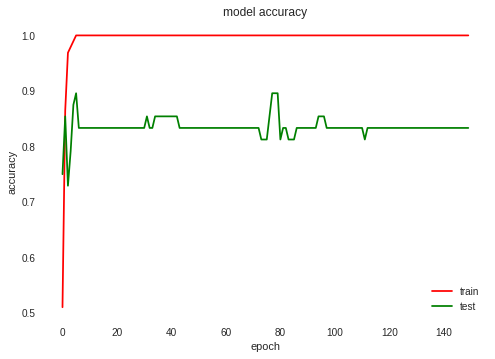

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

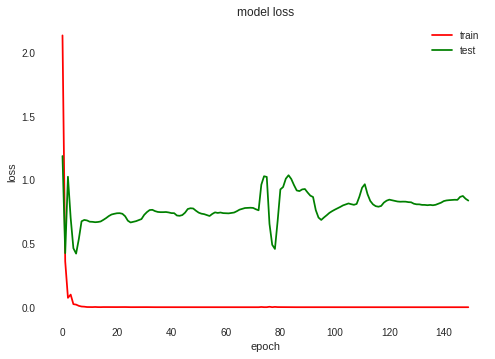

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
x_test = np.load('/content/drive/My Drive/x_test.npy')
y_test = np.load('/content/drive/My Drive/y_test.npy')
y_test = to_categorical(y_test, num_classes = 4)

In [19]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.94      0.94      0.94        18
           2       0.75      1.00      0.86        18
           3       0.00      0.00      0.00         5

   micro avg       0.88      0.88      0.88        60
   macro avg       0.67      0.72      0.69        60
weighted avg       0.82      0.88      0.85        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.grid(b=False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

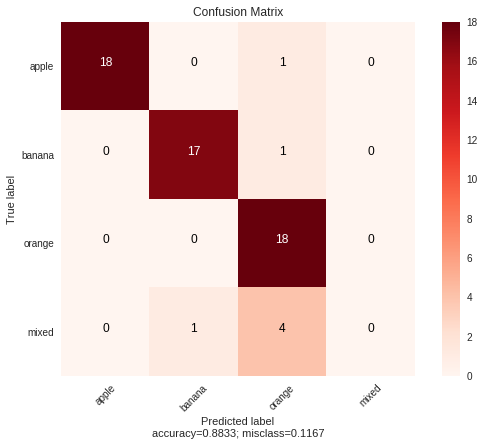

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['apple', 'banana', 'orange', 'mixed'],
                      title        = "Confusion Matrix")

In [23]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_v3 import InceptionV3
input_tensor = Input(shape=(224,224,3))
base_model = InceptionV3(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

87916544/87910968 [==============================] - 4s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_50 (Activation)      (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________

In [24]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 150, verbose=1,  validation_data=(x_valid, y_valid))

Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 7s 36ms/step - loss: 2.8792 - acc: 0.4219 - val_loss: 9.2269 - val_acc: 0.3333
Epoch 2/150
192/192 [==============================] - 1s 7ms/step - loss: 1.0621 - acc: 0.6823 - val_loss: 12.2034 - val_acc: 0.2292
Epoch 3/150
192/192 [==============================] - 1s 7ms/step - loss: 0.6939 - acc: 0.7865 - val_loss: 9.2536 - val_acc: 0.3333
Epoch 4/150
192/192 [==============================] - 1s 7ms/step - loss: 0.4465 - acc: 0.8594 - val_loss: 10.1274 - val_acc: 0.2917
Epoch 5/150
192/192 [==============================] - 1s 7ms/step - loss: 0.3189 - acc: 0.9010 - val_loss: 11.3521 - val_acc: 0.1875
Epoch 6/150
192/192 [==============================] - 1s 7ms/step - loss: 0.3132 - acc: 0.8958 - val_loss: 9.6929 - val_acc: 0.2708
Epoch 7/150
192/192 [==============================] - 1s 7ms/step - loss: 0.1881 - acc: 0.9635 - val_loss: 11.0755 - val_acc: 0.2708
Epoch 8/150
192/192

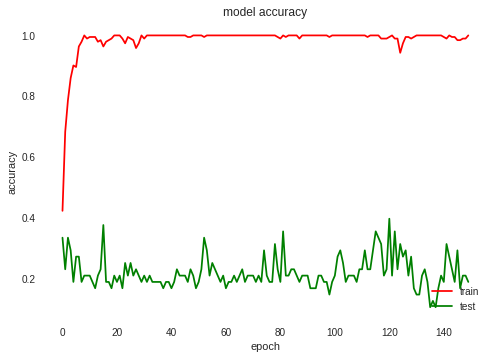

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

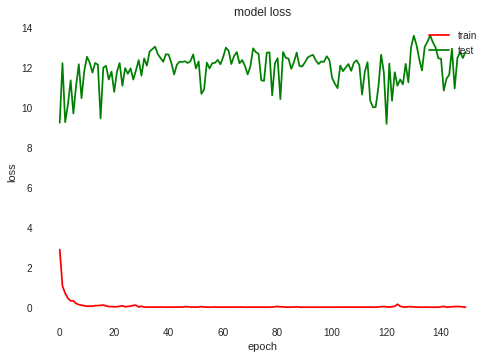

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.20      0.32      0.24        19
           1       0.20      0.06      0.09        18
           2       0.12      0.17      0.14        18
           3       0.00      0.00      0.00         5

   micro avg       0.17      0.17      0.17        60
   macro avg       0.13      0.13      0.12        60
weighted avg       0.16      0.17      0.15        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


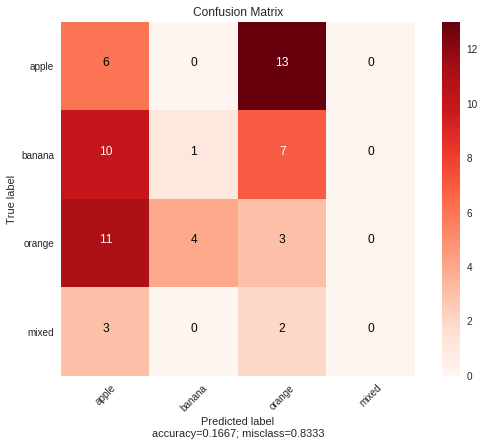

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['apple', 'banana', 'orange', 'mixed'],
                      title        = "Confusion Matrix")

In [29]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.inception_resnet_v2 import InceptionResNetV2
input_tensor = Input(shape=(224,224,3))
base_model = InceptionResNetV2(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

219062272/219055592 [==============================] - 7s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 111, 111, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_144 (Activation)     (None, 111, 111, 32) 0           batch_normalization_95[0][0]     
__________________________________________

In [30]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 200, verbose=1,  validation_data=(x_valid, y_valid))

Train on 192 samples, validate on 48 samples
Epoch 1/200
192/192 [==============================] - 15s 78ms/step - loss: 1.8062 - acc: 0.4688 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 2/200
192/192 [==============================] - 3s 17ms/step - loss: 0.8113 - acc: 0.7917 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 3/200
192/192 [==============================] - 3s 17ms/step - loss: 0.4845 - acc: 0.8073 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 4/200
192/192 [==============================] - 3s 17ms/step - loss: 0.3150 - acc: 0.8958 - val_loss: 11.4170 - val_acc: 0.2917
Epoch 5/200
192/192 [==============================] - 3s 17ms/step - loss: 0.2123 - acc: 0.9323 - val_loss: 11.0812 - val_acc: 0.3125
Epoch 6/200
192/192 [==============================] - 3s 17ms/step - loss: 0.1315 - acc: 0.9635 - val_loss: 13.7675 - val_acc: 0.1458
Epoch 7/200
192/192 [==============================] - 3s 17ms/step - loss: 0.1231 - acc: 0.9740 - val_loss: 11.9542 - val_acc: 0.2500
Epoch 8/2

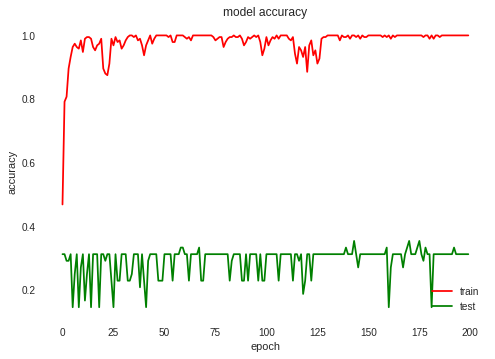

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

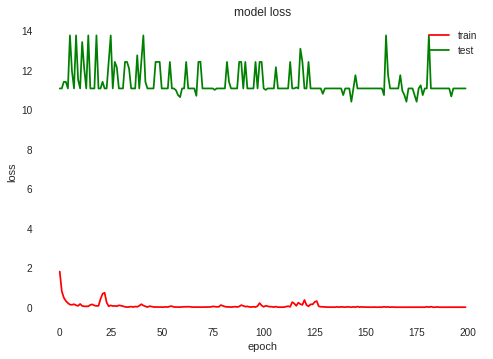

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        18
           2       0.30      1.00      0.46        18
           3       0.00      0.00      0.00         5

   micro avg       0.30      0.30      0.30        60
   macro avg       0.07      0.25      0.12        60
weighted avg       0.09      0.30      0.14        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


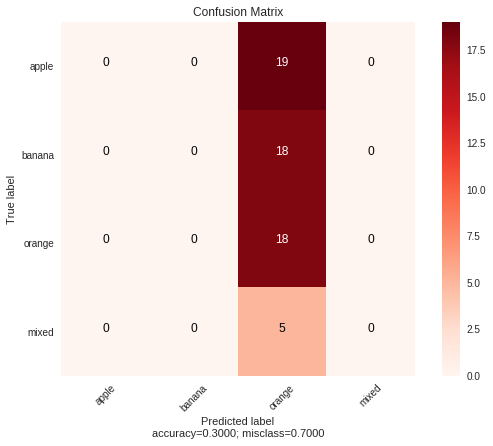

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['apple', 'banana', 'orange', 'mixed'],
                      title        = "Confusion Matrix")

In [35]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.densenet import DenseNet201
input_tensor = Input(shape=(224,224,3))
base_model =  DenseNet201(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
for layer in base_model.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

74842112/74836368 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________

In [36]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 200, verbose=1,  validation_data=(x_valid, y_valid))

Train on 192 samples, validate on 48 samples
Epoch 1/200
192/192 [==============================] - 23s 119ms/step - loss: 2.4255 - acc: 0.4062 - val_loss: 8.7301 - val_acc: 0.3750
Epoch 2/200
192/192 [==============================] - 3s 15ms/step - loss: 1.6245 - acc: 0.7188 - val_loss: 4.2174 - val_acc: 0.4375
Epoch 3/200
192/192 [==============================] - 3s 15ms/step - loss: 1.2116 - acc: 0.8906 - val_loss: 9.1741 - val_acc: 0.3333
Epoch 4/200
192/192 [==============================] - 3s 15ms/step - loss: 1.0776 - acc: 0.9010 - val_loss: 6.7203 - val_acc: 0.5000
Epoch 5/200
192/192 [==============================] - 3s 15ms/step - loss: 0.6552 - acc: 0.9219 - val_loss: 4.6859 - val_acc: 0.3750
Epoch 6/200
192/192 [==============================] - 3s 15ms/step - loss: 0.1586 - acc: 0.9427 - val_loss: 6.0885 - val_acc: 0.4375
Epoch 7/200
192/192 [==============================] - 3s 15ms/step - loss: 0.0928 - acc: 0.9844 - val_loss: 6.6210 - val_acc: 0.4583
Epoch 8/200
192

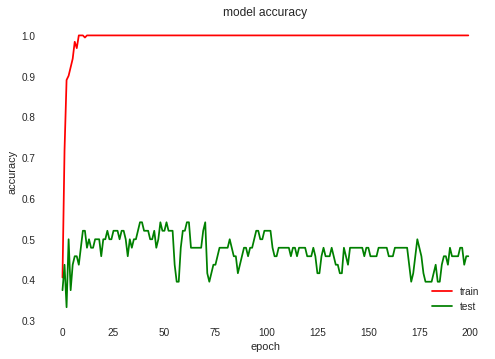

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

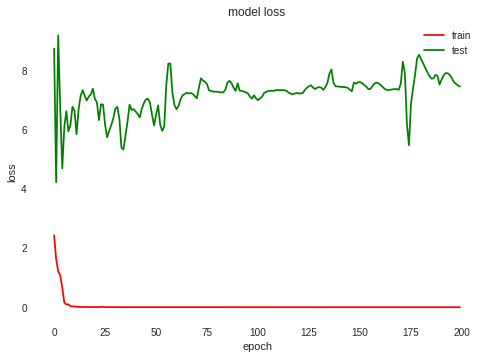

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [39]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.37      0.94      0.53        18
           2       1.00      0.22      0.36        18
           3       0.00      0.00      0.00         5

   micro avg       0.50      0.50      0.50        60
   macro avg       0.57      0.41      0.38        60
weighted avg       0.70      0.50      0.47        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


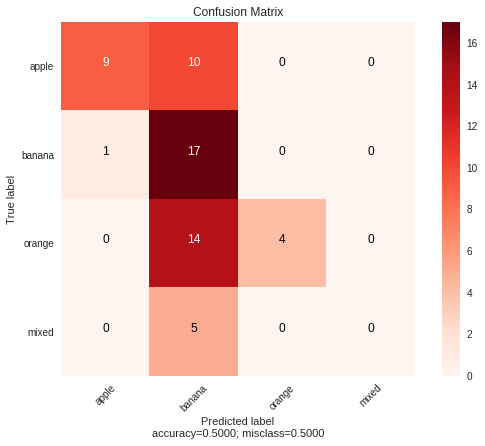

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['apple', 'banana', 'orange', 'mixed'],
                      title        = "Confusion Matrix")

In [41]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Conv2D, MaxPooling2D, MaxPooling1D, GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, LSTM, TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 
from keras.applications.resnet50 import ResNet50
input_tensor = Input(shape=(224,224,3))
base_model = ResNet50(input_tensor = input_tensor, include_top = False, pooling = 'average', weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1000, activation = 'relu')(x)
x = Dense(4, activation = 'softmax')(x)
model = Model(base_model.input,x)
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [42]:
hist = model.fit(x_train,y_train,batch_size = 32, epochs = 200, verbose=1,  validation_data=(x_valid, y_valid))

Train on 192 samples, validate on 48 samples
Epoch 1/200


ResourceExhaustedError: ignored

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
vfrom sklearn.metrics import classification_report
pred = model.predict(x_test)
print(classification_report(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1)))

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
plot_confusion_matrix(cm = cm,
                      normalize    = False,
                      cmap = 'Reds',
                      target_names = ['apple', 'banana', 'orange', 'mixed'],
                      title        = "Confusion Matrix")